In [2]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [13]:
weight = 0.7
bias = 0.3 

start =0
end =1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1) #[50]-->[50,1]
y = weight*X + bias

In [15]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [16]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [26]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
       
      
      #Plots training data, test data and compares predictions.
      
 
    plt.figure(figsize=(10, 7))

    
  # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14});

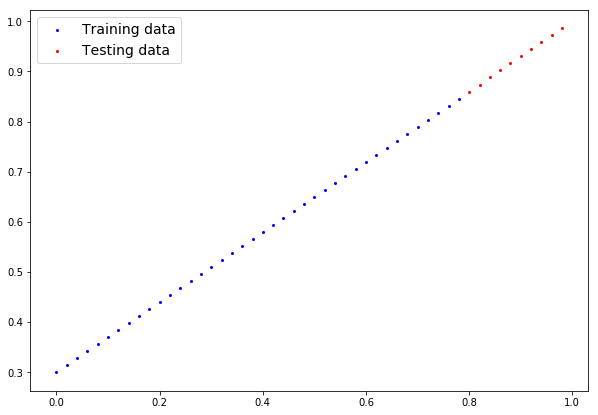

In [27]:
plot_predictions()

In [33]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype = torch.float,requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1,dtype = torch.float,requires_grad = True))
        
    def forward(self,x)  :
        return self.weights*x+self.bias

In [41]:
torch.manual_seed(42)
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

In [42]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
# # Make predictions with model inderence model i sfaster and does same things as no_grad
# with torch.inference_mode(): 
#     y_preds = model_0(X_test)

# older PyTorch code 
with torch.no_grad():
    y_preds = model_0(X_test)

In [45]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

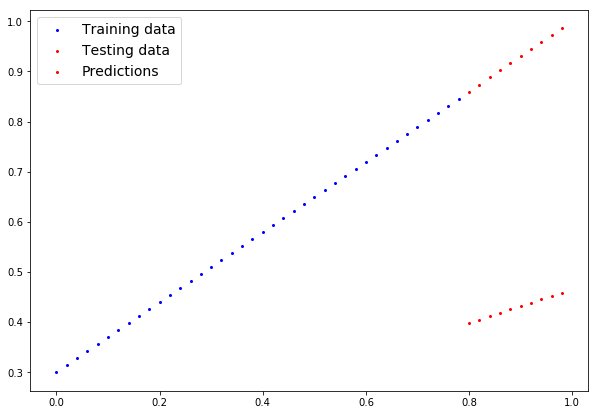

In [46]:
plot_predictions(predictions=y_preds)

# loss function and optimizer

MAE -diff in predicted and actual and mean of them


In [47]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)


<h1>PyTorch training loop</h1>
<li>Forward pass</li>
<li>Calculate the loss</li>
<li>Zero gradients</li>
<li>backpropogation</li>
<li>update optimizer</li>

In [52]:
import torch
weights = torch.tensor([1.,2.],requires_grad=True)
for epoch in range(3):
    out = (weights**3).sum()
    print('out',out)
    out.backward()
    print(weights.grad)#our grad are accumalated and added again in each epochs
    
    #weights.grad.zero_()

out tensor(9., grad_fn=<SumBackward0>)
tensor([ 3., 12.])
out tensor(9., grad_fn=<SumBackward0>)
tensor([ 6., 24.])
out tensor(9., grad_fn=<SumBackward0>)
tensor([ 9., 36.])


In [53]:
import torch
weights = torch.tensor([1.,2.],requires_grad=True)
for epoch in range(3):
    out = (weights**3).sum()
    print('out',out)
    out.backward()
    print(weights.grad)#our grad are accumalated and added again in each epochs
    
    weights.grad.zero_()

out tensor(9., grad_fn=<SumBackward0>)
tensor([ 3., 12.])
out tensor(9., grad_fn=<SumBackward0>)
tensor([ 3., 12.])
out tensor(9., grad_fn=<SumBackward0>)
tensor([ 3., 12.])


In [51]:
torch.manual_seed(42)

epochs=100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train() #sets the model in training mode
    
    #forward pass on train data
    y_pred = model_0(X_train)
    
    #calculate the loss (pred - actual)
    loss = loss_fn(y_pred,y_train)
    
    #zerso the prev grads
    optimizer.zero_grad()
    
    #calculate graident inp =X**3 ---> 3*X**2
    loss.backward()
    
    #update the parameters
    optimizer.step()
    
    
    model_0.eval() #put the model in evaluation mode.
    
    with torch.no_grad():
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred,y_test.type(torch.float))
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'epoch :{epoch} | MAE Train_loss: {loss} | MAE Test Loss: {test_loss}')

epoch :0 | MAE Train_loss: 0.3013603687286377 | MAE Test Loss: 0.4675941467285156
epoch :10 | MAE Train_loss: 0.18615032732486725 | MAE Test Loss: 0.33288419246673584
epoch :20 | MAE Train_loss: 0.08227583020925522 | MAE Test Loss: 0.2069590985774994
epoch :30 | MAE Train_loss: 0.051819466054439545 | MAE Test Loss: 0.14023718237876892
epoch :40 | MAE Train_loss: 0.04503796249628067 | MAE Test Loss: 0.11182953417301178
epoch :50 | MAE Train_loss: 0.04132963344454765 | MAE Test Loss: 0.09809747338294983
epoch :60 | MAE Train_loss: 0.03785243630409241 | MAE Test Loss: 0.08776430785655975
epoch :70 | MAE Train_loss: 0.03441363573074341 | MAE Test Loss: 0.07949177175760269
epoch :80 | MAE Train_loss: 0.030979644507169724 | MAE Test Loss: 0.07190610468387604
epoch :90 | MAE Train_loss: 0.027548830956220627 | MAE Test Loss: 0.06363359093666077


In [54]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
#Loading and using pytorch model

In [59]:
from pathlib import Path
#create directory models
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path

MODEL_NAME = '01_pytorch_workflow_model_0.pth'

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3 Save the Model state dict

print(f'saving model to : {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),f = MODEL_SAVE_PATH)

saving model to : models\01_pytorch_workflow_model_0.pth


In [64]:
Path('models')/ '01_pytorch_workflow_model_0.pth'

WindowsPath('models/01_pytorch_workflow_model_0.pth')

In [65]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [66]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.no_grad():
    loaded_model_preds = loaded_model_0(X_test)

Day 3
PyTorch Neural Network Classification

In [71]:

from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
n_samples = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [88]:
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})

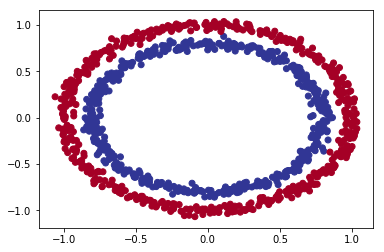

In [77]:
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [89]:
X.shape,y.shape

((1000, 2), (1000,))

In [90]:
import torch
from torch import nn
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:3],y[:2]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733]]),
 tensor([1., 1.]))

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [112]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        #take 2 inp produces 5 op
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
            
    def forward(self,X):
        return self.layer_2(self.layer_1(X)) #x --> layer1-->layer22
    
model = CircleModel().to(device)   
model    

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

"nn.Sequential" performs a forward pass computation of the input 
data through the layers in the order they appear.

In [101]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

<li>disdavatage here is, since sequential runs in sequential order, 
<li>and we want somthing else to happen rather than just straight forward, 
<li>we need our own custom function

In [114]:
#make predictions:

preds = model(x_train.to(device))
print(f"Length of predictions: {len(preds)}, Shape: {preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 800, Shape: torch.Size([800, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1189],
        [-0.0365],
        [-0.2564],
        [-0.2243],
        [-0.5242],
        [-0.1482],
        [-0.4974],
        [-0.4220],
        [-0.5266],
        [-0.0983]], device='cuda:0', grad_fn=<SliceBackward>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#create a loss

loss_fn = nn.BCEWithLogitsLoss() #BCEloss with sigmoid built in

#create an optimizer

optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.1)

In [116]:
#calculate accuracy

def accuracy_fn(y_true , y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [119]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model(x_test.to(device))[:5]
y_logits 
#these are raw output from equ y = mx+c

tensor([[-0.4923],
        [-0.5701],
        [-0.1918],
        [-0.5779],
        [-0.0381]], device='cuda:0', grad_fn=<SliceBackward>)

In [120]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3793],
        [0.3612],
        [0.4522],
        [0.3594],
        [0.4905]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [124]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward>)

In [127]:
y_pred_labels = torch.round(torch.sigmoid(model(x_test.to(device))))
y_pred_labels[:10]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward>)

In [128]:
y_pred_labels.squeeze()[:10] #removes extra dimension

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       grad_fn=<SliceBackward>)

# buidl model

In [135]:
torch.manual_seed(42)

epochs=100
x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

for epoch in range(epochs):
    #set the model in train 
    
    model.train()
    
    #forward pass
    y_logits = model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #calculate loss/accuracy
    
    loss = loss_fn(y_logits,y_pred)#BCElohits works with logits
    acc = accuracy_fn(y_train,y_pred)
    
    #optimzer zero grads
    optimizer.zero_grad()
    
    #loss bakwards 
    loss.backward()
    
    #update the param
    optimizer.step()
    
    
    ###Testing
    model.eval()
    
    with torch.no_grad():
        #forward_pass
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #calcualte loss/accuracy
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_pred)
   # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")     

Epoch: 0 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 10 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 20 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 30 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 40 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 50 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 60 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 70 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 80 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%
Epoch: 90 | Loss: 0.34098, Accuracy: 42.88% | Test loss: 0.79669, Test acc: 44.00%


In [138]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

AttributeError: module 'torch' has no attribute 'inference_mode'

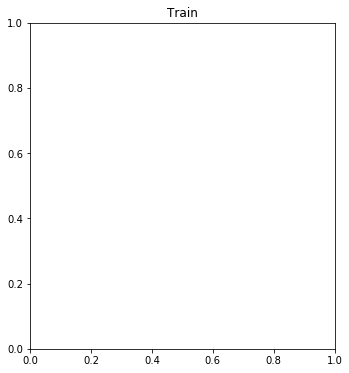

In [139]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
#Model could not learn beacuse what we did was using only linear model
#Since our data is circle and non-linearity is present, we need to use RELO

In [141]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() #so we dont need to use it on prediction
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [143]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [147]:
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.no_grad():
        
      # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69428, Accuracy: 50.00% | Test Loss: 0.69347, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69161, Accuracy: 54.62% | Test Loss: 0.69051, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.69073, Accuracy: 50.88% | Test Loss: 0.68920, Test Accuracy: 54.50%
Epoch: 300 | Loss: 0.68974, Accuracy: 51.38% | Test Loss: 0.68773, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68862, Accuracy: 51.38% | Test Loss: 0.68613, Test Accuracy: 56.00%
Epoch: 500 | Loss: 0.68731, Accuracy: 52.00% | Test Loss: 0.68437, Test Accuracy: 56.00%
Epoch: 600 | Loss: 0.68574, Accuracy: 54.87% | Test Loss: 0.68244, Test Accuracy: 57.50%
Epoch: 700 | Loss: 0.68373, Accuracy: 59.75% | Test Loss: 0.68026, Test Accuracy: 62.50%
Epoch: 800 | Loss: 0.68105, Accuracy: 56.75% | Test Loss: 0.67766, Test Accuracy: 58.00%
Epoch: 900 | Loss: 0.67757, Accuracy: 58.63% | Test Loss: 0.67455, Test Accuracy: 60.00%


In [ ]:
#assignment problem

In [150]:
import torch
from torch import nn
import pandas as pd

In [153]:
from sklearn.datasets import make_moons
rs = 42

In [165]:
X, y = make_moons(n_samples=1000,random_state=rs)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [157]:
print(X.shape,y.shape)

(1000, 2) (1000,)


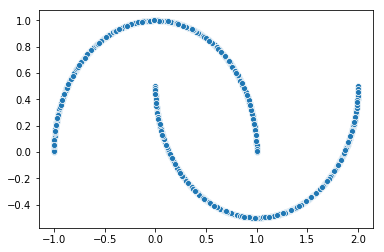

In [166]:
sns.scatterplot(X[:,0],X[:,1])

In [167]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [210]:
class Moon(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5 ,out_features = 1)
        self.relu = nn.ReLU()
        
    def forward(self,x) :
        return self.layer_2(self.relu(self.layer_1(x)))

model_m = Moon().to(device)
model_m

Moon(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [202]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_m.parameters(),lr=0.01)

In [201]:
list(model_m.parameters())

[Parameter containing:
 tensor([[-0.0123,  0.5534],
         [-0.5024,  0.0445],
         [-0.4826,  0.2180],
         [-0.2435,  0.2167],
         [-0.1473,  0.5865]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.4191, -0.4217, -0.4217,  0.6360,  0.2356], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.4303, -0.3691, -0.4436, -0.3499, -0.3008]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([0.1811], device='cuda:0', requires_grad=True)]

In [189]:
def accuracy_fn(actual,pred):
    acc = torch.eq(actual,pred).sum().item()/len(actual)
    return acc*100

In [214]:
#trainig model
epochs = 1000

# Put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_m.train()
    
    #forward pass
    logits = model_m(x_train).squeeze()
    train_pred = torch.round((torch.sigmoid(logits)))
    
    #calculate loss
    loss = loss_fn(logits,train_pred)
    acc = accuracy_fn(y_train,train_pred)
    
    
    #remove the prev gradients
    optimizer.zero_grad()
    
    #backpropagte
    loss.backward()
    
    #update weights
    optimizer.step()
    
    
    model_m.eval()
    with torch.no_grad():
        test_logits = model_m(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
         # 2. Calcuate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test,test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 100 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 200 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 300 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 400 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 500 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 600 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 700 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 800 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%
Epoch: 900 | Loss: 0.50900, Accuracy: 50.25% | Test Loss: 0.72523, Test Accuracy: 49.00%


In [221]:
import torch
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=in_features, 
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, 
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_m = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_m

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [222]:
torch.manual_seed(rs)

epochs=1000

# Send data to the device
X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
    model_m.train()

  # 1. Forward pass
    y_logits = model_m(X_train).squeeze()
      # print(y_logits[:5]) # model raw outputs are "logits"
    y_pred_probs = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
    loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
    acc = accuracy_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
    optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
    optimizer.step()

  ### Testing
    model_0.eval() 
    with torch.no_grad():
        test_logits = model_m(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(test_pred, y_test.int()) 

  # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")
     


Epoch: 0 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 100 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 200 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 300 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 400 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 500 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 600 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 700 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 800 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
Epoch: 900 | Loss: 0.70 Acc: 36.25 | Test loss: 0.70 Test acc: 38.50
